## Digit Recognizer

Although this is a computer vision problem, we employ here a simple model using **K-Nearest Neighbors** algorithm in this notebook to be a good starting point. We use the **GridSearchCV** to fine tune the hyperparameters such as *"n_neighbors", and "weights"*. Furthermore, we use **Data Augmentation** or **Artificial Data Synthesis** technique in this notebook to boost the model's performance on the test set.

In [39]:
%matplotlib inline

import numpy as np # Linear algebra
import pandas as pd # For data manipulation
import json
import os
import matplotlib.pyplot as plt # For visualization
from sklearn.neighbors import KNeighborsClassifier # For modelling
from sklearn.model_selection import cross_val_score, GridSearchCV # For evaluation and hyperparameter tuning
from sklearn.metrics import confusion_matrix, classification_report # For evaluation
from scipy.ndimage import shift, rotate, zoom # For data augmentation

**Peeking the data**

Loading the datasets into dataframes

In [40]:
train_df = pd.read_csv("../../assets/data/mnist_train.csv")
test_df = pd.read_csv("../../assets/data/mnist_test.csv")

Knowing about the features in the datasets

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 35.9 MB


In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 6.0 MB


Converting the train and test dataframes into numpy arrays

In [43]:
X_train = train_df.iloc[:6000, 1:].values
y_train = train_df.iloc[:6000, 0].values
X_test = test_df.iloc[:1000, 1:].values
y_test = test_df.iloc[:1000, 0].values

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6000, 784)
y_train shape: (6000,)
X_test shape: (1000, 784)
y_test shape: (1000,)


Visualizing a digit from the training data as a 28 X 28 image

Label: 0


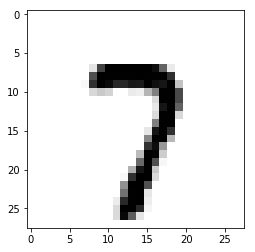

In [44]:
some_digit = X_train[46]

some_digit_image = some_digit.reshape(28, 28)
print(f"Label: {y_train[40]}")
plt.imshow(some_digit_image, cmap="binary")
plt.show()

**Train Model**

In [45]:
estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)
predictions = estimator.predict(X_test)

print(classification_report(y_test, predictions, digits=3), end="\n\n")

              precision    recall  f1-score   support

           0      0.885     1.000     0.939       100
           1      0.877     1.000     0.935       100
           2      1.000     0.890     0.942       100
           3      0.903     0.930     0.916       100
           4      0.918     0.890     0.904       100
           5      0.882     0.900     0.891       100
           6      0.949     0.940     0.945       100
           7      0.904     0.850     0.876       100
           8      0.951     0.780     0.857       100
           9      0.832     0.890     0.860       100

    accuracy                          0.907      1000
   macro avg      0.910     0.907     0.906      1000
weighted avg      0.910     0.907     0.906      1000




In [46]:
print(confusion_matrix(y_test, predictions), end="\n\n")

[[100   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  3   2  89   1   0   1   1   2   1   0]
 [  0   0   0  93   0   2   0   0   2   3]
 [  1   1   0   0  89   0   2   0   0   7]
 [  1   0   0   4   1  90   1   2   0   1]
 [  2   1   0   0   2   1  94   0   0   0]
 [  0   9   0   0   1   0   0  85   0   5]
 [  2   1   0   4   4   6   1   2  78   2]
 [  4   0   0   1   0   2   0   3   1  89]]



Fine-tuning the model by finding the best values for the hyperparameters (weights, n_neighbors) using GridSearchCV

In [47]:
grid_params = {
    "weights": ['distance'],
    "n_neighbors": [3,  5, 7, 9, 11]
}

estimator = KNeighborsClassifier()
grid_estimator = GridSearchCV(estimator, # Base estimator
                              grid_params, # Parameters to tune
                              verbose=2, # Verbosity of the logs
                              n_jobs=-1) # Number of jobs to be run concurrently with -1 meaning all the processors

# Fitting the estimator with training data
grid_estimator.fit(X_train, y_train)

print(f"Best Score: {grid_estimator.best_score_}", end="\n\n")
print(f"Best Parameters: \n{json.dumps(grid_estimator.best_params_, indent=4)}",
      end="\n\n")
print("Grid Search CV results:")
results_df = pd.DataFrame(grid_estimator.cv_results_)
results_df

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished


Best Score: 0.9448333333333334

Best Parameters: 
{
    "n_neighbors": 3,
    "weights": "distance"
}

Grid Search CV results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.607185,0.200978,11.994038,0.201209,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.945833,0.945833,0.939167,0.945000,0.948333,0.944833,0.003046,1
1,1.332688,0.063543,12.156543,0.449470,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.948333,0.935000,0.932500,0.944167,0.942500,0.940500,0.005883,2
2,1.333111,0.074264,12.319519,0.475964,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.947500,0.930000,0.929167,0.938333,0.939167,0.936833,0.006737,3
3,1.269663,0.074638,12.240741,0.395837,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.942500,0.937500,0.932500,0.936667,0.935000,0.936833,0.003308,4
4,1.387173,0.116225,11.737193,0.944839,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.941667,0.933333,0.930833,0.930833,0.929167,0.933167,0.004453,5


**Best parameter values found:** {n_neighbors: 3, weights: 'distance'}

Fitting a new model with the found hyperparameter values to the training data and making predictions on the test data

In [48]:
estimator = KNeighborsClassifier(n_neighbors=3, weights='distance')
estimator.fit(X_train, y_train)
predictions = estimator.predict(X_test)

In [49]:
confusion_matrix(y_test, predictions)

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,   1,  87,   2,   0,   0,   2,   2,   1,   0],
       [  0,   0,   0,  93,   0,   2,   0,   0,   2,   3],
       [  1,   1,   0,   0,  86,   0,   2,   0,   0,  10],
       [  0,   0,   0,   5,   0,  91,   0,   2,   0,   2],
       [  2,   1,   0,   0,   2,   1,  94,   0,   0,   0],
       [  0,   9,   0,   0,   1,   0,   0,  85,   0,   5],
       [  3,   0,   0,   4,   1,   3,   1,   2,  84,   2],
       [  2,   0,   0,   0,   0,   1,   0,   3,   3,  91]], dtype=int64)

In [50]:
print(classification_report(y_test, predictions, digits=3), end="\n\n")

              precision    recall  f1-score   support

           0      0.885     1.000     0.939       100
           1      0.893     1.000     0.943       100
           2      1.000     0.870     0.930       100
           3      0.894     0.930     0.912       100
           4      0.956     0.860     0.905       100
           5      0.929     0.910     0.919       100
           6      0.949     0.940     0.945       100
           7      0.904     0.850     0.876       100
           8      0.933     0.840     0.884       100
           9      0.805     0.910     0.854       100

    accuracy                          0.911      1000
   macro avg      0.915     0.911     0.911      1000
weighted avg      0.915     0.911     0.911      1000




**Data Augmentation**

Each image in the training set is 

* shifted down, up, left and right by one pixel
* rotated clockwise and anti-clockwise 
* clipped and zoomed at two different ranges

generating eight different images. The image is clipped before zooming to preserve the image size.

In [51]:
def shift_in_one_direction(image, direction):
    """
    Shifts an image by one pixel in the specified direction
    """
    if direction == "DOWN":
        image = shift(image, [1, 0])
    elif direction == "UP":
        image = shift(image, [-1, 0])
    elif direction == "LEFT":
        image = shift(image, [0, -1])
    else:
        image = shift(image, [0, 1])

    return image


def shift_in_all_directions(image):
    """
    Shifts an image in all the directions by one pixel
    """
    reshaped_image = image.reshape(28, 28)

    down_shifted_image = shift_in_one_direction(reshaped_image, "DOWN")
    up_shifted_image = shift_in_one_direction(reshaped_image, "UP")
    left_shifted_image = shift_in_one_direction(reshaped_image, "LEFT")
    right_shifted_image = shift_in_one_direction(reshaped_image, "RIGHT")

    return (down_shifted_image, up_shifted_image,
            left_shifted_image, right_shifted_image)


def rotate_in_all_directions(image, angle):
    """
    Rotates an image clockwise and anti-clockwise
    """
    reshaped_image = image.reshape(28, 28)
    
    rotated_images = (rotate(reshaped_image, angle, reshape=False),
                      rotate(reshaped_image, -angle, reshape=False))
    
    return rotated_images


def clipped_zoom(image, zoom_ranges):
    """
    Clips and zooms an image at the specified zooming ranges
    """
    reshaped_image = image.reshape(28, 28)
    
    h, w = reshaped_image.shape
    
    zoomed_images = []
    for zoom_range in zoom_ranges:
        zh = int(np.round(h / zoom_range))
        zw = int(np.round(w / zoom_range))
        top = (h - zh) // 2
        left = (w - zw) // 2
        
        zoomed_images.append(zoom(reshaped_image[top:top+zh, left:left+zw],
                                  zoom_range))
    
    return zoomed_images

def alter_image(image):
    """
    Alters an image by shifting, rotating, and zooming it
    """
    shifted_images = shift_in_all_directions(image)
    rotated_images = rotate_in_all_directions(image, 10)
    zoomed_images = clipped_zoom(image, [1.1, 1.2])
            
    return np.r_[shifted_images, rotated_images, zoomed_images]

X_train_add = np.apply_along_axis(alter_image, 1, X_train).reshape(-1, 784)
y_train_add = np.repeat(y_train, 8)

print(f"X_train_add shape: {X_train_add.shape}")
print(f"y_train_add shape: {y_train_add.shape}")

X_train_add shape: (48000, 784)
y_train_add shape: (48000,)


Combining the synthesized data with the actual training data

In [52]:
X_train_combined = np.r_[X_train, X_train_add]
y_train_combined = np.r_[y_train, y_train_add]

del X_train
del X_train_add
del y_train
del y_train_add

print(f"X_train_combined shape: {X_train_combined.shape}")
print(f"y_train_combined shape: {y_train_combined.shape}")

X_train_combined shape: (54000, 784)
y_train_combined shape: (54000,)


Fitting a new model with the tuned hyperparameters to the combined dataset

In [53]:
cdata_estimator = KNeighborsClassifier(n_neighbors=3, weights='distance')
cdata_estimator.fit(X_train_combined, y_train_combined)
cdata_estimator_predictions = cdata_estimator.predict(X_test)

In [54]:
confusion_matrix(y_test, cdata_estimator_predictions)

array([[ 99,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,  93,   0,   0,   0,   1,   3,   0,   0],
       [  0,   0,   0,  93,   0,   3,   0,   2,   1,   1],
       [  0,   1,   0,   0,  93,   0,   2,   0,   0,   4],
       [  0,   0,   0,   4,   0,  93,   1,   2,   0,   0],
       [  1,   1,   0,   0,   2,   1,  95,   0,   0,   0],
       [  0,   7,   1,   0,   0,   0,   0,  91,   0,   1],
       [  0,   0,   0,   2,   3,   5,   1,   2,  85,   2],
       [  1,   0,   0,   0,   0,   2,   0,   2,   1,  94]], dtype=int64)

In [55]:
print(classification_report(y_test, cdata_estimator_predictions, digits=3), end="\n\n")

              precision    recall  f1-score   support

           0      0.980     0.990     0.985       100
           1      0.893     1.000     0.943       100
           2      0.989     0.930     0.959       100
           3      0.939     0.930     0.935       100
           4      0.949     0.930     0.939       100
           5      0.886     0.930     0.907       100
           6      0.950     0.950     0.950       100
           7      0.892     0.910     0.901       100
           8      0.977     0.850     0.909       100
           9      0.922     0.940     0.931       100

    accuracy                          0.936      1000
   macro avg      0.938     0.936     0.936      1000
weighted avg      0.938     0.936     0.936      1000




**Note:** With **Data Augmentation** the accuracy jumped from 91.6% to 95.3% on the test data.

## Acknowledgments

Thanks to SkalskiP for creating the open-source [Kaggle jupyter notebook](https://www.kaggle.com/code/gauthampughazh/digit-recognition-using-knn), licensed under Apache 2.0. It inspires the majority of the content of this assignment.